<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [ ]:
df.head()

In [ ]:
# your code goes here
sns.displot(df['ConvertedComp'], kde = True)

Plot the histogram for the column `ConvertedComp`.


In [ ]:
# your code goes here
plt.hist(df['ConvertedComp'])

In [ ]:
df['ConvertedComp'].hist()

In [ ]:
# What is the median of the column `ConvertedComp`?

print('Converted Comp Median:', df['ConvertedComp'].median())

How many responders identified themselves only as a **Man**?


In [ ]:
# your code goes here
df['Gender'].value_counts()

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
# your code goes here
df_wo = df[df['Gender']=='Woman']
print('Woman Median:', df_wo['ConvertedComp'].median())

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [ ]:
# your code goes here
df['Age'].describe()

Plot a histogram of the column `Age`.


In [ ]:
# your code goes here
plt.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [ ]:
# your code goes here
sns.boxplot(df['ConvertedComp'])

In [ ]:
df_ccout = pd.DataFrame(data=df['ConvertedComp'])
df_ccout.plot(kind='box', figsize=(8,6))
plt.show()

In [ ]:
df_aout = pd.DataFrame(data=df['Age'])
df_aout.plot(kind='box', figsize=(8,6))
plt.show()

In [ ]:
sns.boxplot(df['ConvertedComp'])

Z-Score Method

In [ ]:
#find the limits
upper1 = df['ConvertedComp'].mean() + 3*df['ConvertedComp'].std()
lower1 = df['ConvertedComp'].mean() - 3*df['ConvertedComp'].std()
print('upper limit:', upper1)
print('lower limit:', lower1)

In [ ]:
#find the outliers

df.loc[(df['ConvertedComp'] > upper1) | (df['ConvertedComp'] < lower1)]

In [ ]:
dfold = df.loc[(df['ConvertedComp'] > upper1) | (df['ConvertedComp'] < lower1)]

In [ ]:
#trimming - delete the outliers
newdf = df.loc[(df['ConvertedComp'] < upper1) | (df['ConvertedComp'] > lower1)]
print('old:', len(df))
print('new:', len(newdf))

In [ ]:
newdf['ConvertedComp'].median()

IQR METHOD

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [ ]:
# your code goes here
df['ConvertedComp'].dropna(axis=0,inplace=True)
Q1,Q3 = df['ConvertedComp'].quantile(0.25), df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print( 'Inter Quartile Range for Converted Comp:', IQR)

Find out the upper and lower bounds.


In [ ]:
# your code goes here
upperb = Q3+(IQR*1.5)
lowerb = Q1-(IQR*1.5)

print('Upper Bound:', upperb)
print('Lower Bound:', lowerb)

Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
# your code goes here
(df['ConvertedComp']<lowerb) | (df['ConvertedComp']>upperb)

In [ ]:
(df['ConvertedComp']>lowerb) | (df['ConvertedComp']<upperb)

In [ ]:
#trimming - delete outliers
lastdf = df.loc[(df['ConvertedComp']<lowerb) | (df['ConvertedComp']>upperb)]
print(lastdf['ConvertedComp'].mean())

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


Percentile Method

In [ ]:
uplimit = df['ConvertedComp'].quantile(0.99)
lowlimit = df['ConvertedComp'].quantile(0.01)
print('upper', uplimit)
print('lower', lowlimit)

In [ ]:
sns.boxplot(df['ConvertedComp'])

In [ ]:
df.loc[(df['ConvertedComp']<lowerb) | (df['ConvertedComp']>upperb)]

In [ ]:
# your code goes here
df2 = df['ConvertedComp'].clip(upperb, lowerb)
df2.describe()

In [ ]:
df['ConvertedComp'].describe()

In [ ]:
df2.median()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [15]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ConvertedComp'>

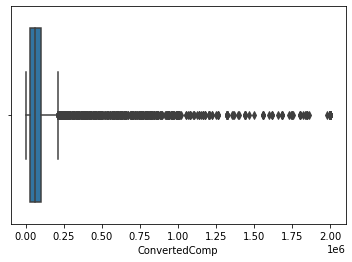

In [8]:
plt.boxplot(df['ConvertedComp'])

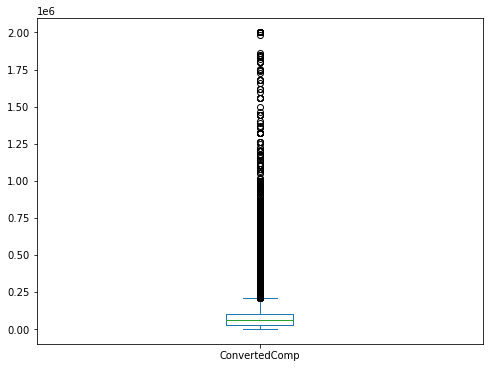

In [14]:
df_ccout = pd.DataFrame(data=df['ConvertedComp'])
df_ccout.plot(kind='box', figsize=(8,6))
plt.show()

In [13]:
upper_limit = df['ConvertedComp'].mean() + 3* df['ConvertedComp'].std()
lower_limit = df['ConvertedComp'].mean() - 3* df['ConvertedComp'].std()
print('upper', upper_limit)
print('lower', lower_limit)

upper 1015956.2789443618
lower -752762.8157048986


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
